In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
X_train = np.array(data[["YearBuilt", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "BedroomAbvGr", "GarageCars", "GarageArea", "PoolArea"]])
Y_train = np.array(data[["SalePrice"]])
X_train.shape, Y_train.shape

((1460, 10), (1460, 1))

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1168, 10), (292, 10), (1168, 1), (292, 1))

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="mse",)

In [64]:
output = model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 37800464384.0000 
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37913202688.0000 
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 41549996032.0000
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 37414723584.0000
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 38534483968.0000
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 38250151936.0000
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41663934464.0000 
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 38700216320.0000
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 40328417280.0000
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 37364826112.0000
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 39542693888.0000
Epoch 12/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 39231057920.0000
Epoch 13/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 

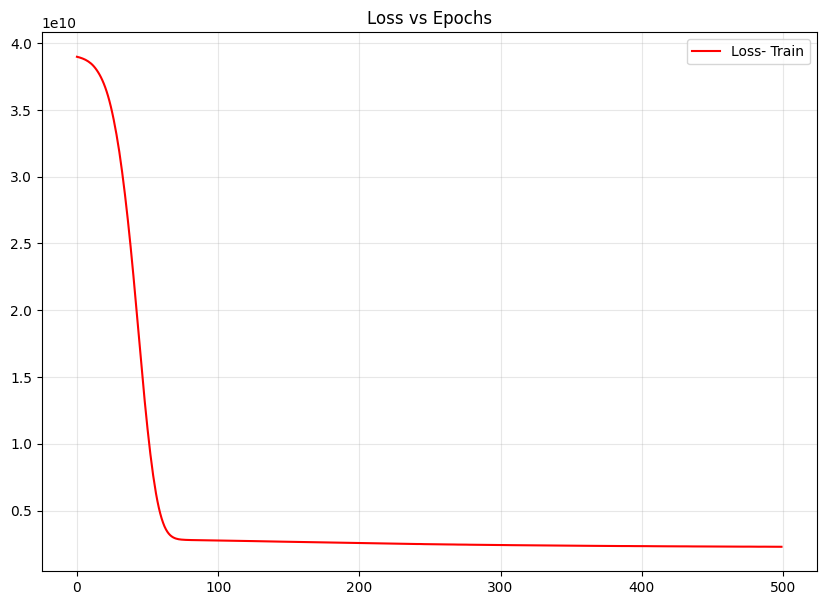

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(output.history["loss"], label="Loss- Train", color='red')
plt.title("Loss vs Epochs")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [73]:
loss_train = model.evaluate(X_train, Y_train)
print("The loss train is",loss_train)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 2097182592.0000
The loss train is 2282086400.0


Own House

In [67]:
own_house = np.array([[1985, 1000, 1200, 1000, 2200, 2, 4, 4, 500, 500]])
prediction = model.predict(own_house)
prediction
print("The price of your house is:" ,prediction[0][0], "USD")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The price of your house is: 229281.06 USD


In [68]:
model.save("House_Price.h5")

In [69]:
data_test = pd.read_csv("data/test.csv")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [70]:
X_test = np.array(data_test[["YearBuilt", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "BedroomAbvGr", "GarageCars", "GarageArea", "PoolArea"]])
X_test.shape

(1459, 10)

In [71]:
prediction_test = model.predict(X_test)
prediction_test = pd.DataFrame(prediction_test, columns=["SalePrice"])
prediction_test.head()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step


,SalePrice
0,144479.250000
1,171236.109375
2,182565.015625
3,179936.453125
4,177584.625000


In [72]:
prediction_test.to_csv("House_Price_Prediction.csv", index=False)